Il codice nella cella seguente **deve essere eseguito**, ma **non deve essere modificato**, perché essenziale per un'esecuzione senza errori del successivo codice del laboratorio. Dopo averlo eseguito, attendi che il pallino adiacente ad R in alto a destra diventi bianco o che scompaia il simbolo [*].

In [1]:
#Esegui ma non modificare. Attendi  che scompaia il simbolo [*] 
#o che il pallino adiacente ad R in alto a destra diventi bianco
#potrebbe essere necessario qualche minuto
source('lib/preamble.R')

## Estensione a tre variabili (Caso $p=3$)

Estendiamo questo ragionamento a tre variabili, e aggiungiamo all'analisi anche la variabile `Max.Speed`. Visualizziamo in 3D le variabili `Draught`, `Length` e `Max.Speed`, secondo diverse angolazioni. 

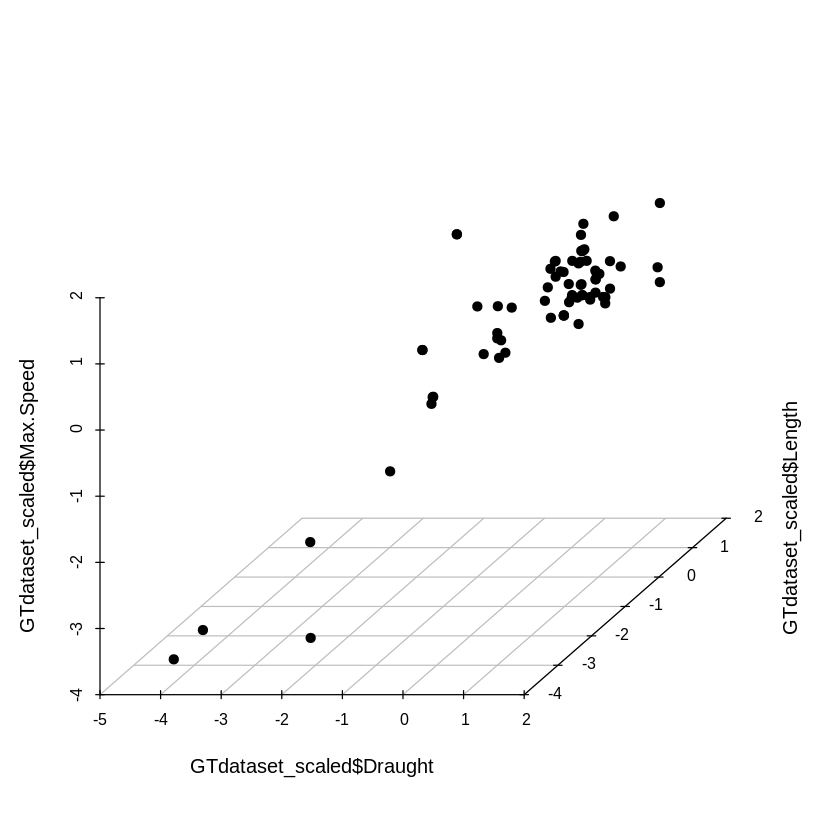

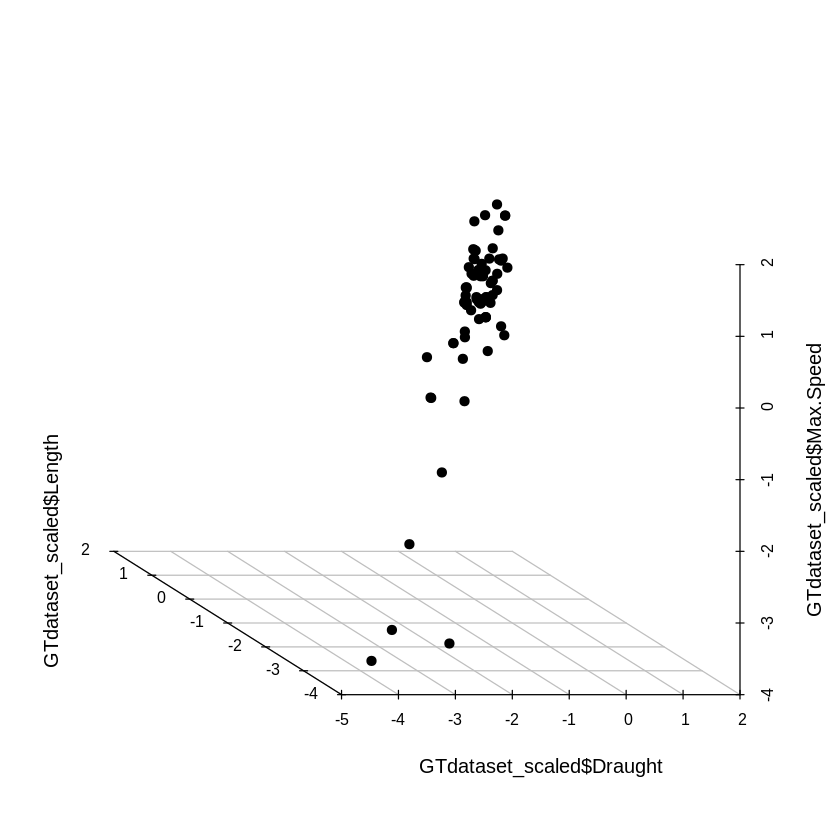

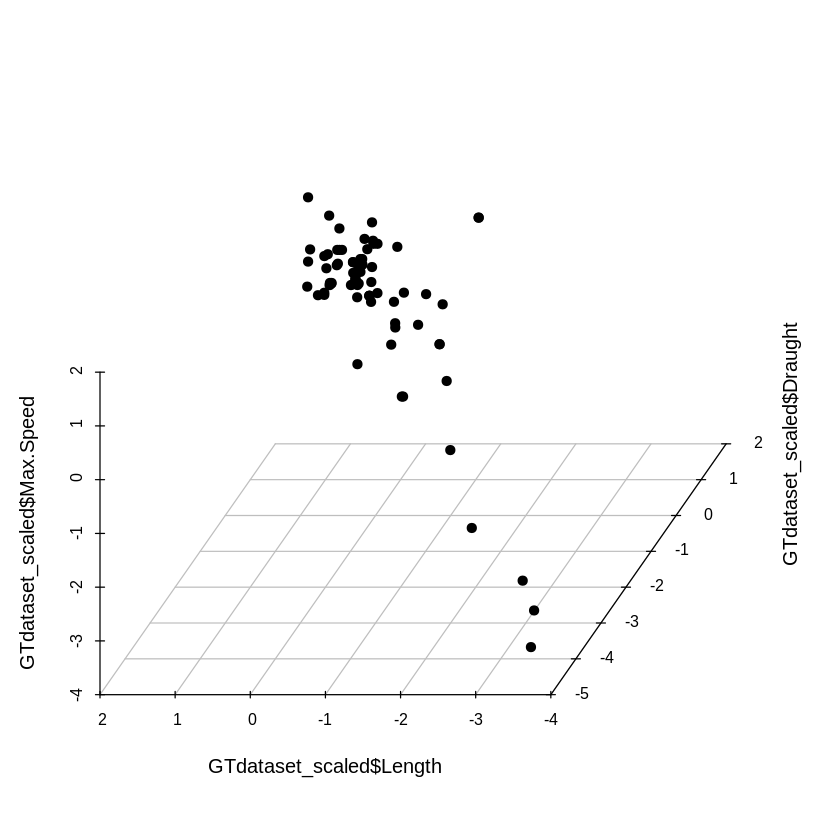

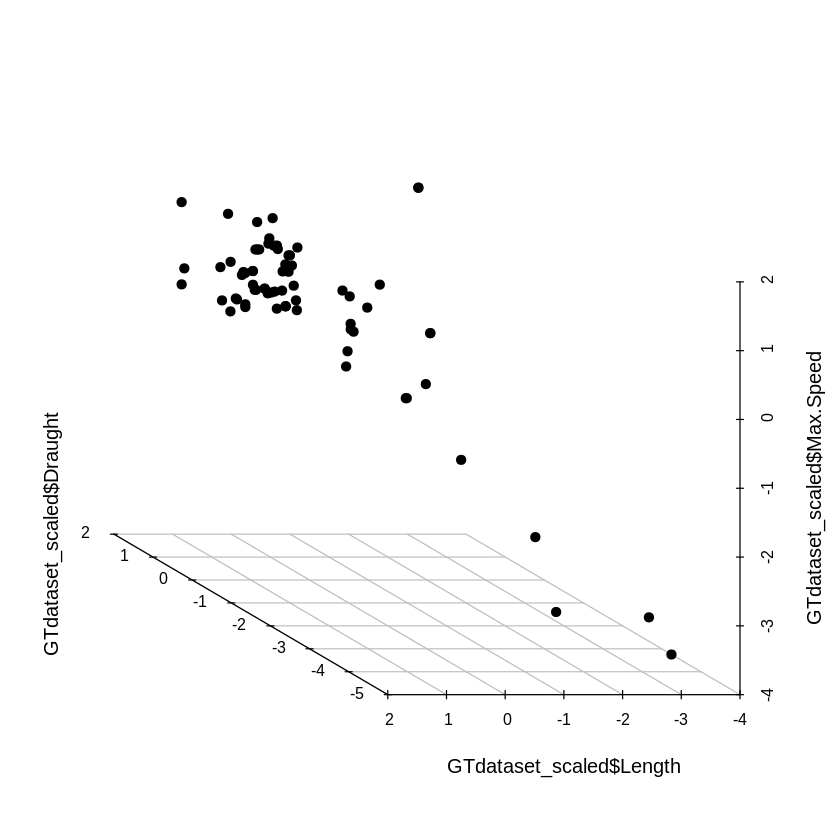

In [2]:
library(scatterplot3d)
scatterplot3d(GTdataset_scaled$Draught,GTdataset_scaled$Length,GTdataset_scaled$Max.Speed, pch=19, box=F)
scatterplot3d(GTdataset_scaled$Draught,GTdataset_scaled$Length,GTdataset_scaled$Max.Speed, pch=19, box=F, angle=150)
scatterplot3d(GTdataset_scaled$Draught,GTdataset_scaled$Length,GTdataset_scaled$Max.Speed, pch=19, box=F, angle=240)
scatterplot3d(GTdataset_scaled$Draught,GTdataset_scaled$Length,GTdataset_scaled$Max.Speed, pch=19, box=F, angle=330)

Anche in questo caso, possiamo intuire che perderemmo poca informazione circa la variabilità dei dati sperimentali comprimendoli in due o, addirittura, una dimensione. 
A supporto di questa affermazione, gli indici di correlazione campionaria, riportati nella  *matrice delle correlazioni campionarie*, tra tutte e tre le possibili coppie di variabili, sono molto vicini all'unità. Tale matrice, come sappiamo, viene calcolata mediante la funzione `cor()`

In [3]:
GTdataset_scaled %>% select(Draught, Length,Max.Speed) %>% cor()

,Draught,Length,Max.Speed
Draught,1.0000000,0.9388550,0.7803253
Length,0.9388550,1.0000000,0.6507095
Max.Speed,0.7803253,0.6507095,1.0000000


Con `ggpairs()` sappiamo che vengono contemporaneamente visualizzati i grafici a dispersione e calcolati gli indici di correlazione campionaria tra tutte le coppie di variabili del data set in esame. Sulla diagonale, inoltre, viene riportato il *density plot* di ogni variabile.

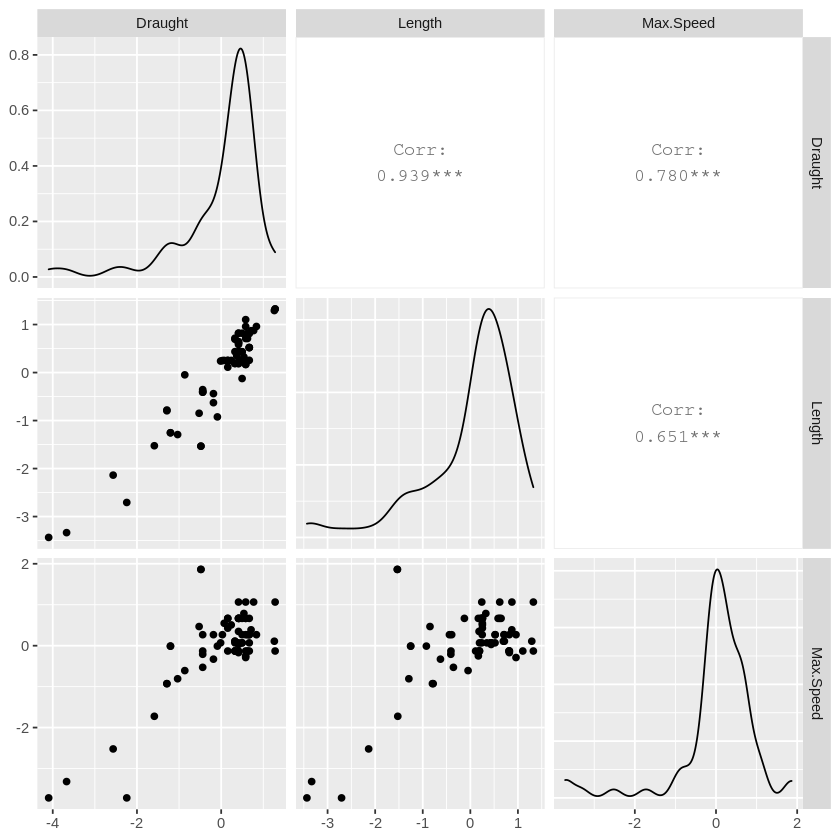

In [4]:
GTdataset_scaled%>% 
  select(Draught, Length, Max.Speed) %>% 
  ggpairs()

Per ricercare la PC1, questa volta in uno spazio a 3 dimensioni, conviene utilizzare direttamente la funzione `prcomp`.

In [5]:
pr.out = GTdataset_scaled %>% select(Max.Speed,Draught, Length) %>% prcomp()
#PC1
a_1 <- pr.out$rotation[,1]
#score della PC1
score_1 <- pr.out$x[,1]
#varianza della PC1
lambda_1 <- pr.out$sdev[1]^2

Possiamo verificare graficamente che le proiezioni dei punti sperimentali lungo la retta avente come direzione la PC1, rappresentano la migliore approssimazione *monodimensionale* (poiché minimizzano la distanza dei punti sperimentali dalla retta avente come direzione la PC1) del data set tridimensionale, preso ad esempio, costituito dalle colonne `Max.Speed`, `Draught` e `Length` del data set `GT`. La scrittura del seguente codice è un po' macchinosa, ma serve unicamente a mostrarti il seguente grafico, che spero troverai utile. Concentrati su quello! 

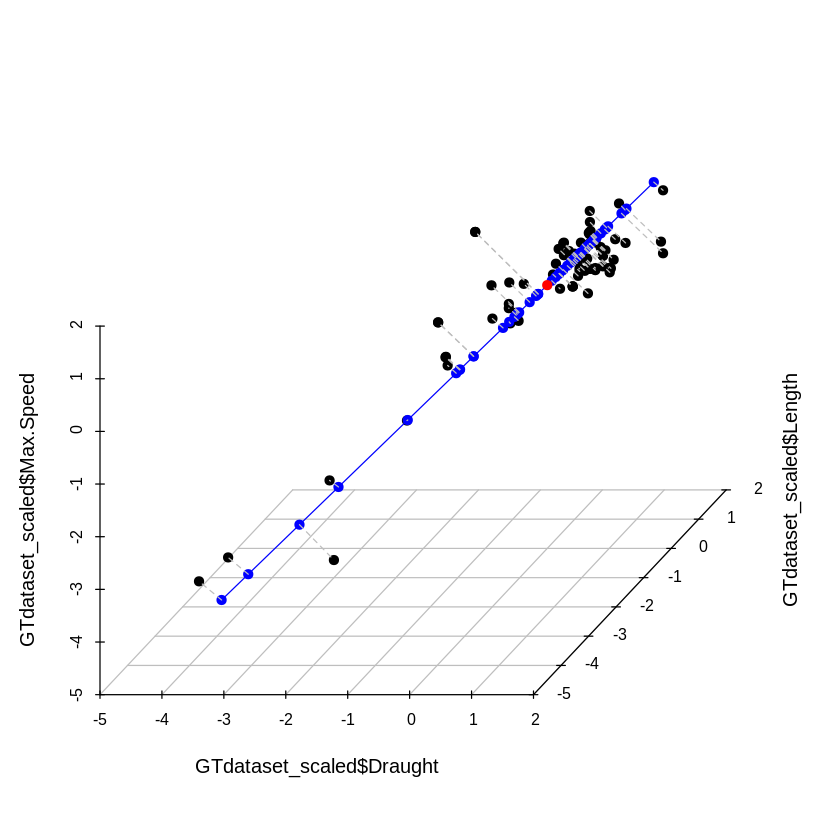

In [6]:
s <- scatterplot3d(GTdataset_scaled$Draught,GTdataset_scaled$Length,GTdataset_scaled$Max.Speed, pch=19, xlim=c(-5,2), ylim=c(-5,2), zlim=c(-5,2), angle = 50, box=FALSE)
s$points3d(score_1*a_1[1],score_1*a_1[2],score_1*a_1[3], col="blue", pch=19, type="l")
s$points3d(score_1*a_1[1],score_1*a_1[2],score_1*a_1[3], col="blue", pch=19)
s$points3d(0,0,0, col="red", pch=19) #rappresentiamo l'origine
for (ii in 1:n) {
  p1 <- s$xyz.convert(score_1[ii]*a_1[1],score_1[ii]*a_1[2],score_1[ii]*a_1[3])
  p2 <- s$xyz.convert(GTdataset_scaled$Draught[ii],GTdataset_scaled$Length[ii],GTdataset_scaled$Max.Speed[ii])
  segments(p1$x,p1$y,p2$x,p2$y,col="grey",lty = 2)
}

Gli score rappresentano le distanze dalla media (rappresentata in rosso nel grafico precedente) delle proiezioni lungo la direzione della PC1. 
Il vettore degli score della PC1 rappresenta, pertanto, una sintesi *monodimensionale* ottimale del data set considerato.

Analogamente, se consideriamo, insieme alla PC1, anche la seconda colonna dell'output `pr.out$x`, che contiene gli score *seconda componente principale* (PC2), ottieniamo la migliore compressione *bidimensionale* del data set tridimensionale. Prima di visualizzarlo definiamo

## Cosa rappresenta la seconda componente principale (PC2)?

La PC2 è la direzione **perpendicolare** alla PC1, passante per l'origine (anche la PC2 avrà media nulla) che minimizza, come la PC1, la distanza dai punti sperimentali.
Analogamente alla PC1, per la PC2 puoi definire

In [7]:
#PC2
a_2 <- pr.out$rotation[,2]
#score della PC2
score_2 <- pr.out$x[,2]
#varianza della PC3
lambda_2 <- pr.out$sdev[2]^2

Visualizziamo la PC2 in verde

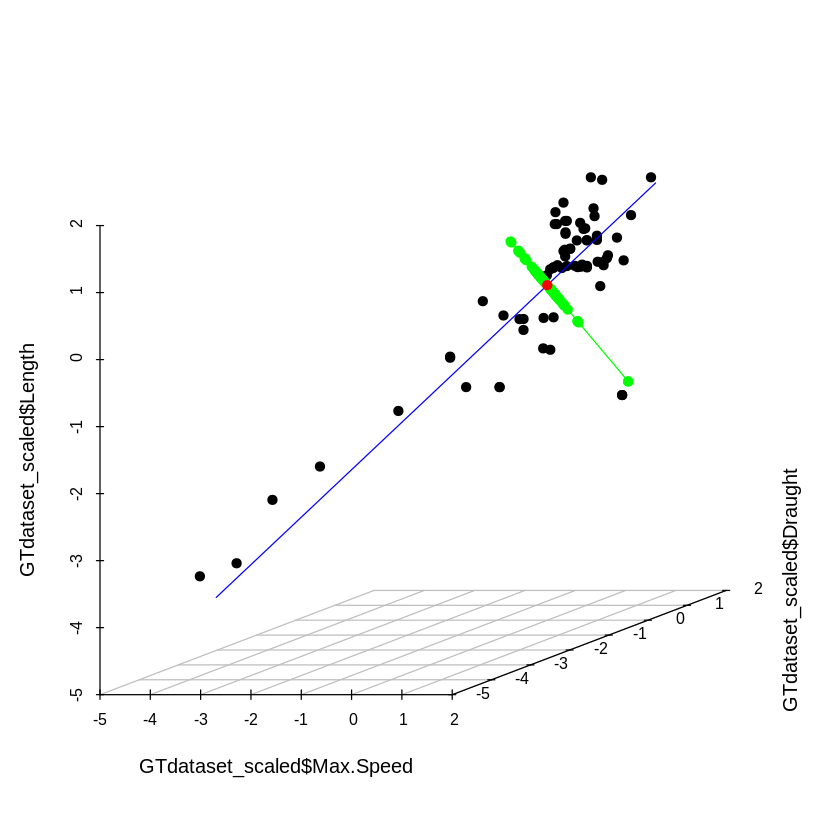

In [8]:
s <- scatterplot3d(GTdataset_scaled$Max.Speed, GTdataset_scaled$Draught,GTdataset_scaled$Length, pch=19, xlim=c(-5,2),ylim=c(-5,2), zlim=c(-5,2),angle = 20, box=F)
s$points3d(score_1*a_1[1],score_1*a_1[2],score_1*a_1[3], col="blue", pch=19, type="l")
s$points3d(score_2*a_2[1],score_2*a_2[2],score_2*a_2[3], col="green", pch=19, type="l")
s$points3d(score_2*a_2[1],score_2*a_2[2],score_2*a_2[3], col="green", pch=19)
s$points3d(0,0,0, col="red", pch=19) #origine

Per ogni PC, la norma dei loading, è, per costruzione, sempre pari a 1.

Gli score della PC2 sono contenuti in `pr.out$x[,2]` e rappresentano le distanze dalla media ($(0,0)$, punto in rosso) delle proiezioni dei punti sperimentali iniziali, riportate in verde sul seguente grafico.
La varianza di `pr.out$x[,2]` 

In [9]:
var(pr.out$x[,2])

[1] 0.3730165

è già disponibile come secondo elemento di `pr.out$sdev` al quadrato

In [10]:
pr.out$sdev[2]^2

[1] 0.3730165

ed è, per costruzione, minore della varianza di `pr.out$sdev`.

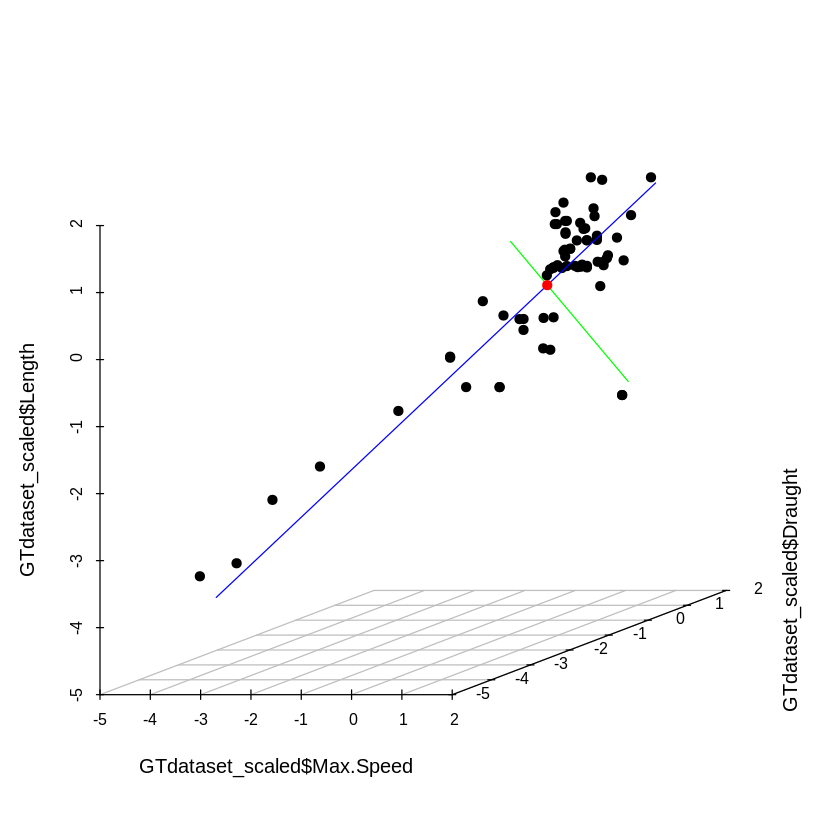

In [11]:
s <- scatterplot3d(GTdataset_scaled$Max.Speed, GTdataset_scaled$Draught,GTdataset_scaled$Length, pch=19, xlim=c(-5,2),ylim=c(-5,2), zlim=c(-5,2),angle = 20, box=F)
s$points3d(score_1*a_1[1],score_1*a_1[2],score_1*a_1[3], col="blue", pch=19, type="l")
s$points3d(score_2*a_2[1],score_2*a_2[2],score_2*a_2[3], col="green", pch=19, type="l")
s$points3d(0,0,0, col="red", pch=19) # origine

## Quante PC posso ricercare al massimo?
Il numero massimo di PC è pari al numero di variabili (*dimensionalità*) del data set originale. L'ultima PC può essere, a differenza delle altre, ottenuta anche come la direzione perpendicolare a tutte le precedenti. 
Si può dimostrare che gli score relativi all'ultima PC totalizzano la varianza più bassa. Ovvero, la retta avente direzione l'ultima PC è, tra tutte le rette dello spazio $p$-dimensionale, quella con la maggiore distanza totale al quadrato dai punti sperimentali. 
Volendola visualizzare, sull'ultimo data set tridimensionale considerato, nello spazio definito dalle variabili `Max.Speed`, `Draught` e `Length` puoi tracciarla analogamente a quanto fatto per le altre (in rosso).  

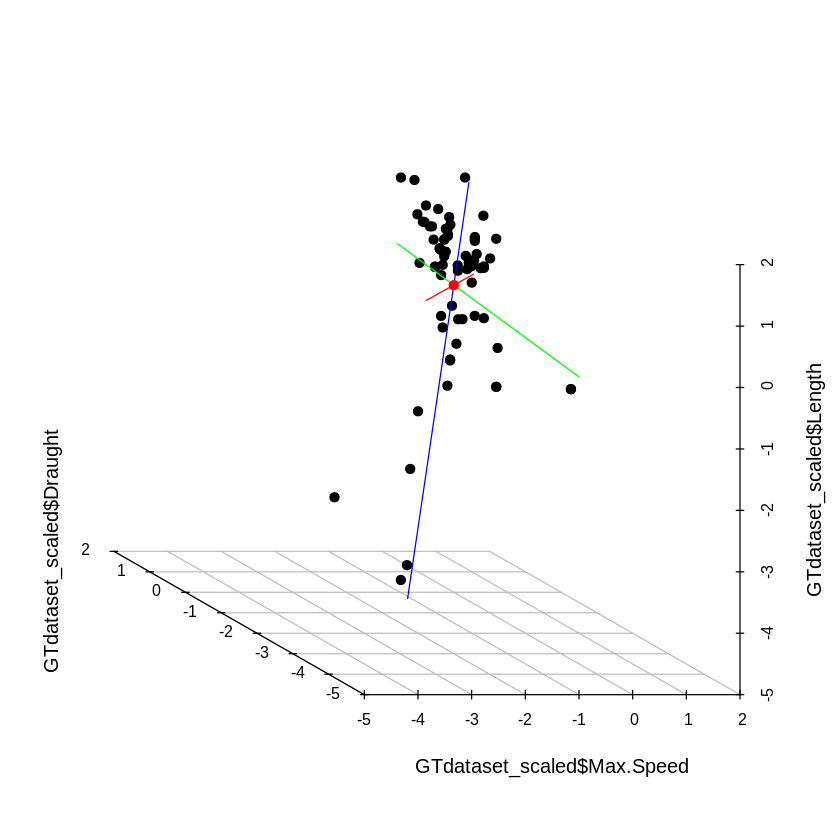

In [12]:
#loading sulla PC2
a_3 <- pr.out$rotation[,3]
#score della PC2
score_3 <- pr.out$x[,3]
#varianza della PC3
lambda_3 <- pr.out$sdev[3]^2

s <- scatterplot3d(GTdataset_scaled$Max.Speed, GTdataset_scaled$Draught,GTdataset_scaled$Length, pch=19, xlim=c(-5,2),ylim=c(-5,2), zlim=c(-5,2),angle = 150, box=F)
s$points3d(score_1*a_1[1],score_1*a_1[2],score_1*a_1[3], col="blue", pch=19, type="l") #PC1
s$points3d(score_2*a_2[1],score_2*a_2[2],score_2*a_2[3], col="green", pch=19, type="l") #PC2
s$points3d(score_3*a_3[1],score_3*a_3[2],score_3*a_3[3], col="red", pch=19, type="l") #PC3
s$points3d(0,0,0, col="red", pch=19) #origine

Utilizzando tutte le PC, riesci a ricostruire esattamente il data set di partenza, ma in un sistema di riferimento, in generale, diverso da quello iniziale. 
Il sistema di riferimento costituito da tutte le componenti principali è un particolare sistema di riferimento in cui 

1. i dati iniziali sono rappresentati dagli score contenuti nella matrice `pr.out$x` 
2. la matrice delle correlazioni campionarie risulta diagonale. Per costruzione le PC sono infatti tra di loro ortogonali.

Per convincertene visualizza la matrice di scatter plot e quella delle correlazioni campionarie per il data set degli score `pr.out$x`.

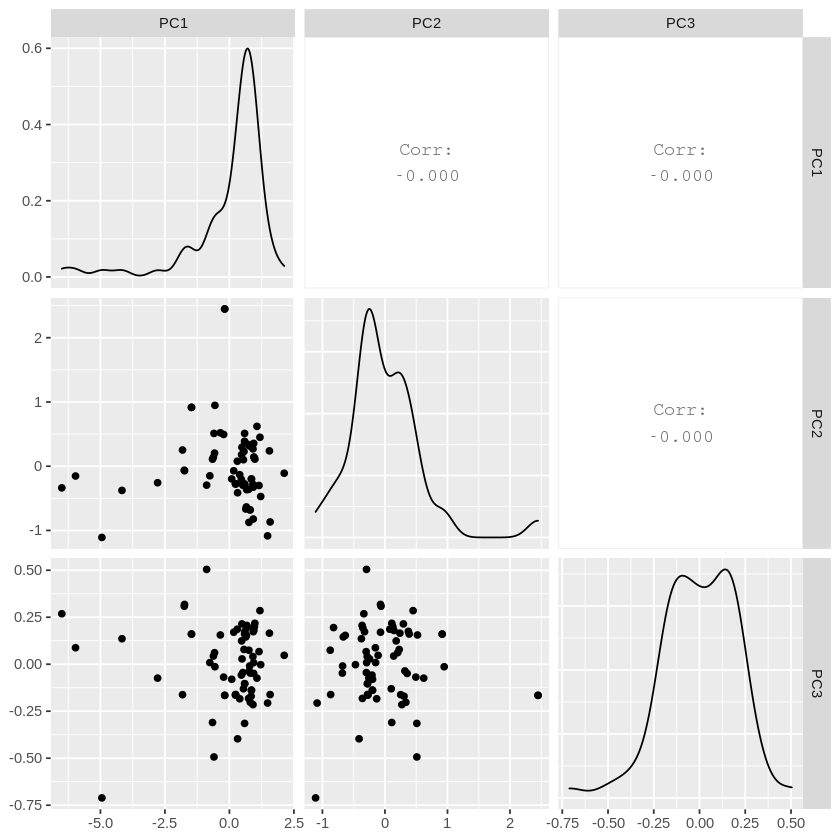

In [13]:
pr.out$x %>%as.data.frame() %>%  ggpairs()

Osserva che, per costruzione, le varianze delle singole PC sono in ordine decrescente

In [14]:
apply(pr.out$x,2, var) %>% round(2)

PC1  PC2  PC3 
2.59 0.37 0.04